<a href="https://colab.research.google.com/github/693080593/research/blob/master/cHB_Kfold_with_opt_max_depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv('/content/Feed Effect on Biocrude Yield Data ML 080620.csv')
Oil_Yields = data['Bio-crude Oil Yield']
Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude dataset has 225 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,85.50
30,30.9,27.3,0.0,0.0,32.7,0.0,9.1,41.00
60,13.3,25.5,0.0,0.0,38.7,0.0,0.0,27.10
90,6.5,65.2,0.0,0.0,20.7,0.0,8.0,38.00
120,1.9,23.4,66.4,0.0,8.0,0.0,0.0,23.60
150,0.0,0.0,0.0,0.0,100.0,0.0,0.0,1.30
180,0.0,0.0,39.2,35.1,0.0,20.2,0.0,26.98
210,0.0,0.0,0.0,100.0,0.0,0.0,0.0,6.50


In [2]:
# TODO: Minimum price of the data
minimum_Oil_Yields = np.min(Oil_Yields)

# TODO: Maximum price of the data
maximum_Oil_Yields = np.max(Oil_Yields)

# TODO: Mean price of the data
mean_Oil_Yields = np.mean(Oil_Yields)

# TODO: Median price of the data
median_Oil_Yields = np.median(Oil_Yields)

# TODO: Standard deviation of prices of the data
std_Oil_Yields = np.std(Oil_Yields)

# Show the calculated statistics

print("Statistics for bio-crude dataset:\n")
print("Minimum bio-crude oil yield:{: .2f} wt%".format(minimum_Oil_Yields))
print("Maximum bio-crude oil yield:{: .2f} wt%".format(maximum_Oil_Yields))
print("Mean bio-crude oil yield:{: .2f} wt%".format(mean_Oil_Yields))
print("Median bio-crude oil yield:{: .2f} wt%".format(median_Oil_Yields))
print("Standard deviation of bio-crude oil yield:{: .2f} wt%".format(std_Oil_Yields))

data.describe()

Statistics for bio-crude dataset:

Minimum bio-crude oil yield: 0.10 wt%
Maximum bio-crude oil yield: 95.86 wt%
Mean bio-crude oil yield: 27.44 wt%
Median bio-crude oil yield: 24.70 wt%
Standard deviation of bio-crude oil yield: 16.71 wt%


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,11.917333,26.313333,17.241605,7.374222,17.050222,9.142230,6.414222,27.436691
std,20.187868,25.337980,25.593518,15.390026,23.677736,17.013235,10.789614,16.749712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.900000
50%,3.500000,23.100000,0.000000,0.000000,8.700000,0.000000,1.100000,24.700000
75%,13.900000,46.400000,29.200000,8.800000,25.500000,14.200000,7.000000,36.300000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,95.860000


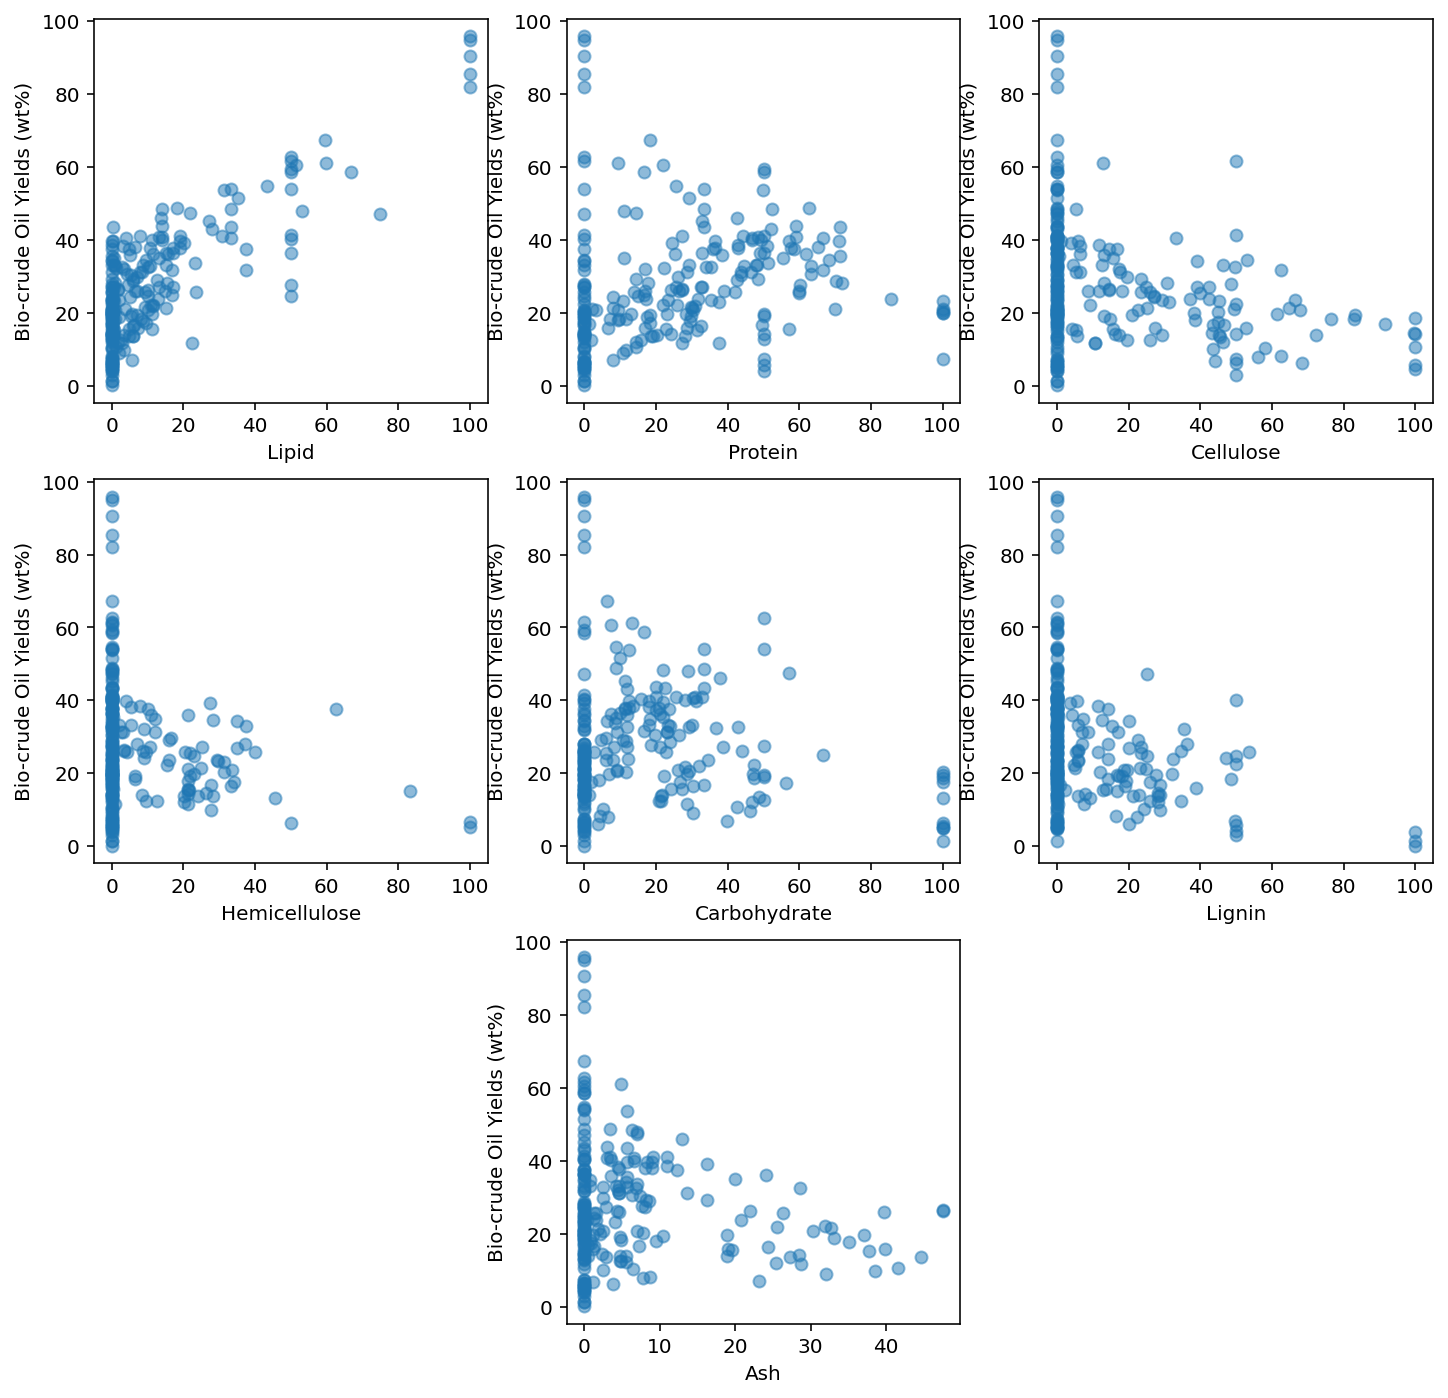

In [3]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

(array([ 3.,  2.,  8.,  8.,  3.,  5., 10., 13., 11., 12., 20.,  8., 11.,
        12., 11.,  6.,  9.,  9.,  8., 10.,  8.,  8.,  4.,  2.,  2.,  4.,
         1.,  0.,  4.,  0.,  3.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  2.]),
 array([ 0.1   ,  2.0152,  3.9304,  5.8456,  7.7608,  9.676 , 11.5912,
        13.5064, 15.4216, 17.3368, 19.252 , 21.1672, 23.0824, 24.9976,
        26.9128, 28.828 , 30.7432, 32.6584, 34.5736, 36.4888, 38.404 ,
        40.3192, 42.2344, 44.1496, 46.0648, 47.98  , 49.8952, 51.8104,
        53.7256, 55.6408, 57.556 , 59.4712, 61.3864, 63.3016, 65.2168,
        67.132 , 69.0472, 70.9624, 72.8776, 74.7928, 76.708 , 78.6232,
        80.5384, 82.4536, 84.3688, 86.284 , 88.1992, 90.1144, 92.0296,
        93.9448, 95.86  ]),
 <a list of 50 Patch objects>)

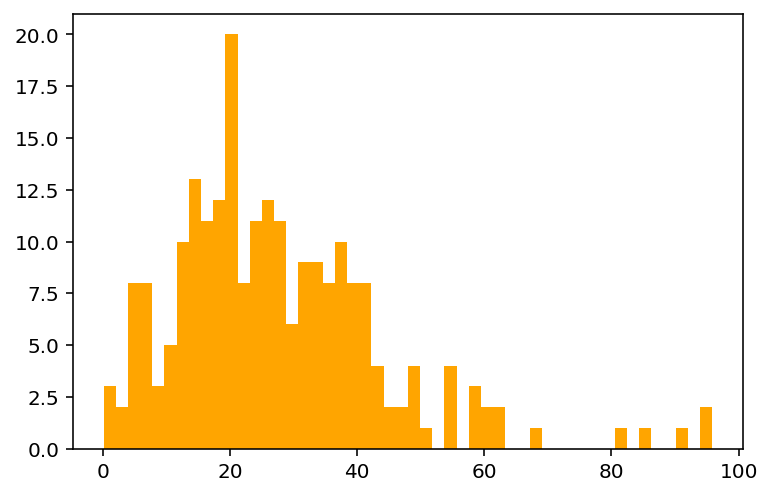

In [4]:
plt.hist(data['Bio-crude Oil Yield'],bins=50,color='orange')

(array([105.,  11.,  14.,   9.,  10.,  13.,   7.,   9.,   5.,   4.,   2.,
          3.,   0.,   1.,   1.,   2.,   4.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,   0.,  11.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   5.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

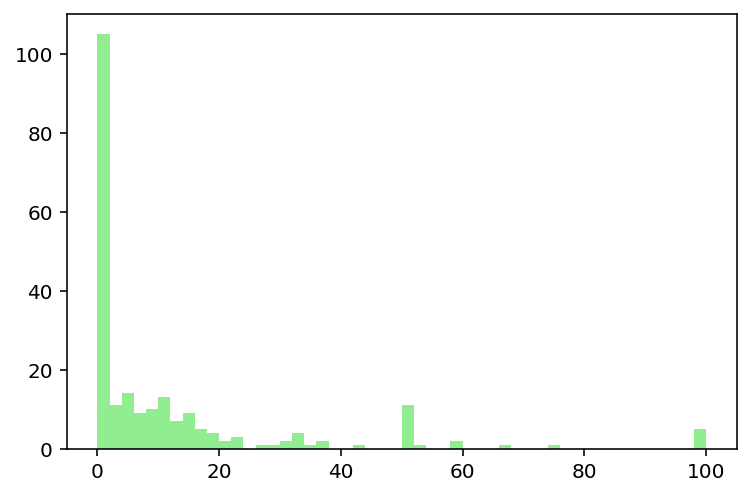

In [5]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


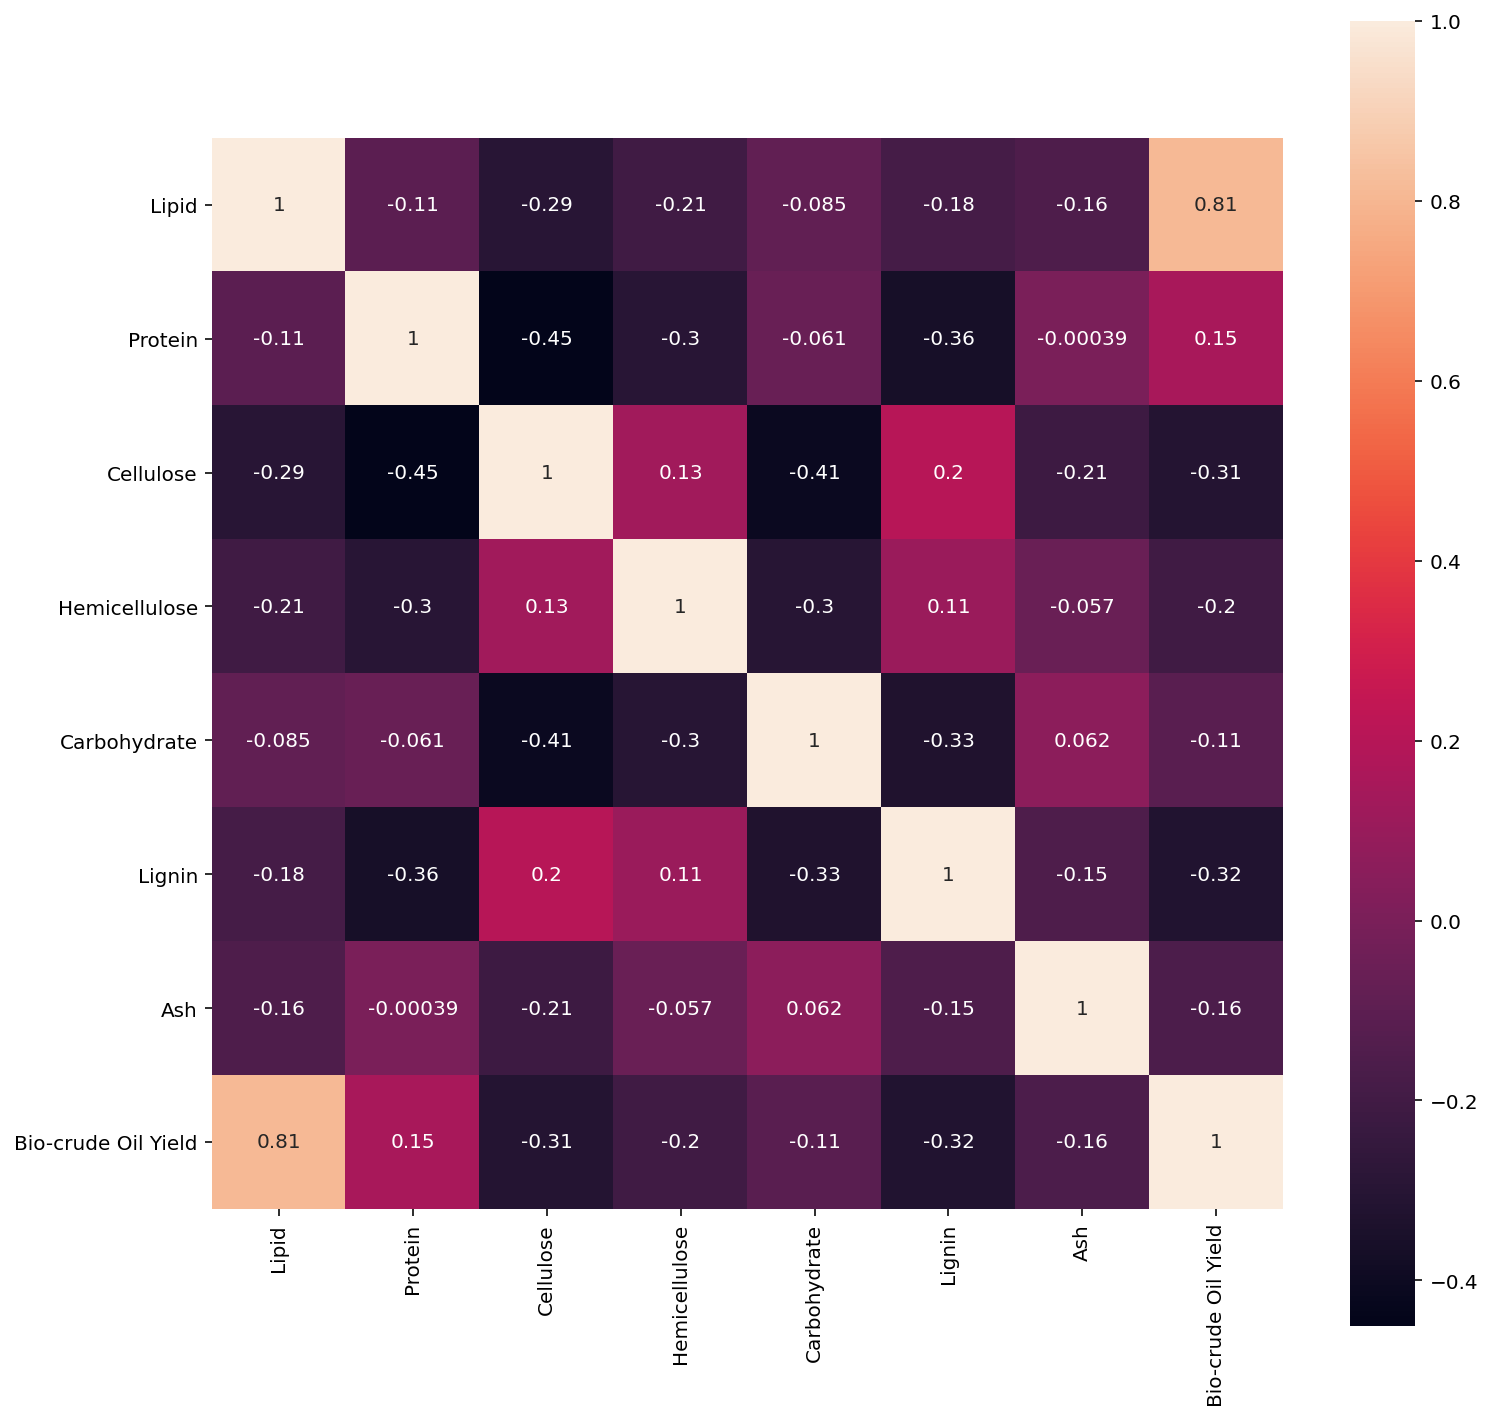

In [6]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [7]:
# Set up Model
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric (y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'
  score = r2_score(y_true, y_predict)

  # Return the score
  return score

In [8]:
# Define predict score
import numpy as np
def performance_metric2(y_true, y_predict):
  """Calculate and reture the ratio of predict value to predict score"""
  y_true_arr = np.arr(y_true)
  y_predict_arr = np.arr(y_predict)

  # Mean value of dataset
  y_true_mean = np.mean(y_true_arr)

  ss_tot = 0
  ss_reg = 0
  ss_res = 0

  for index in range (y_true_arr):
    ss_tot += (y_true_arr[index] - y_true_mean)**2
  
  for index in range (y_true_arr):
    ss_reg += (y_predict_arr[index] - y_true_mean)**2
  
  for index in range (y_true_arr):
    ss_res += (y_predict_arr[index] - y_true_arr[index])**2
  
  score = 1 - (ss_res/ss_tot)

  return score

In [9]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2, random_state=42)

print (Features.shape)
print (X_train.shape)
print (X_test.shape)

# Success
print ("Training and testing split was successful.")

(225, 7)
(180, 7)
(45, 7)
Training and testing split was successful.


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

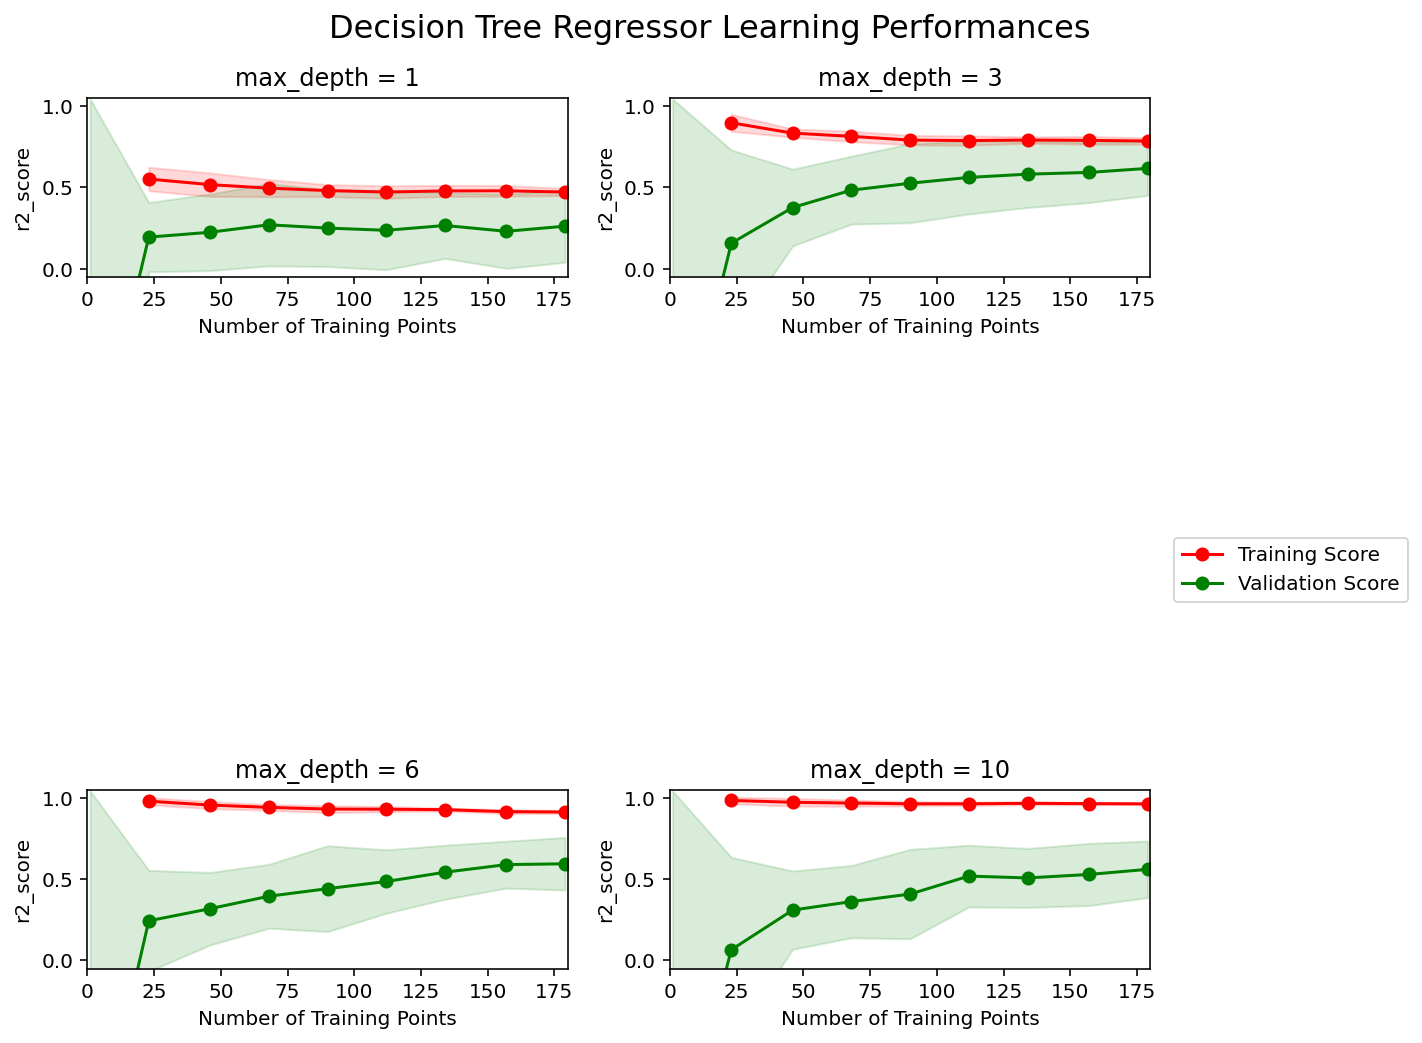

In [10]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(Features, Oil_Yields)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

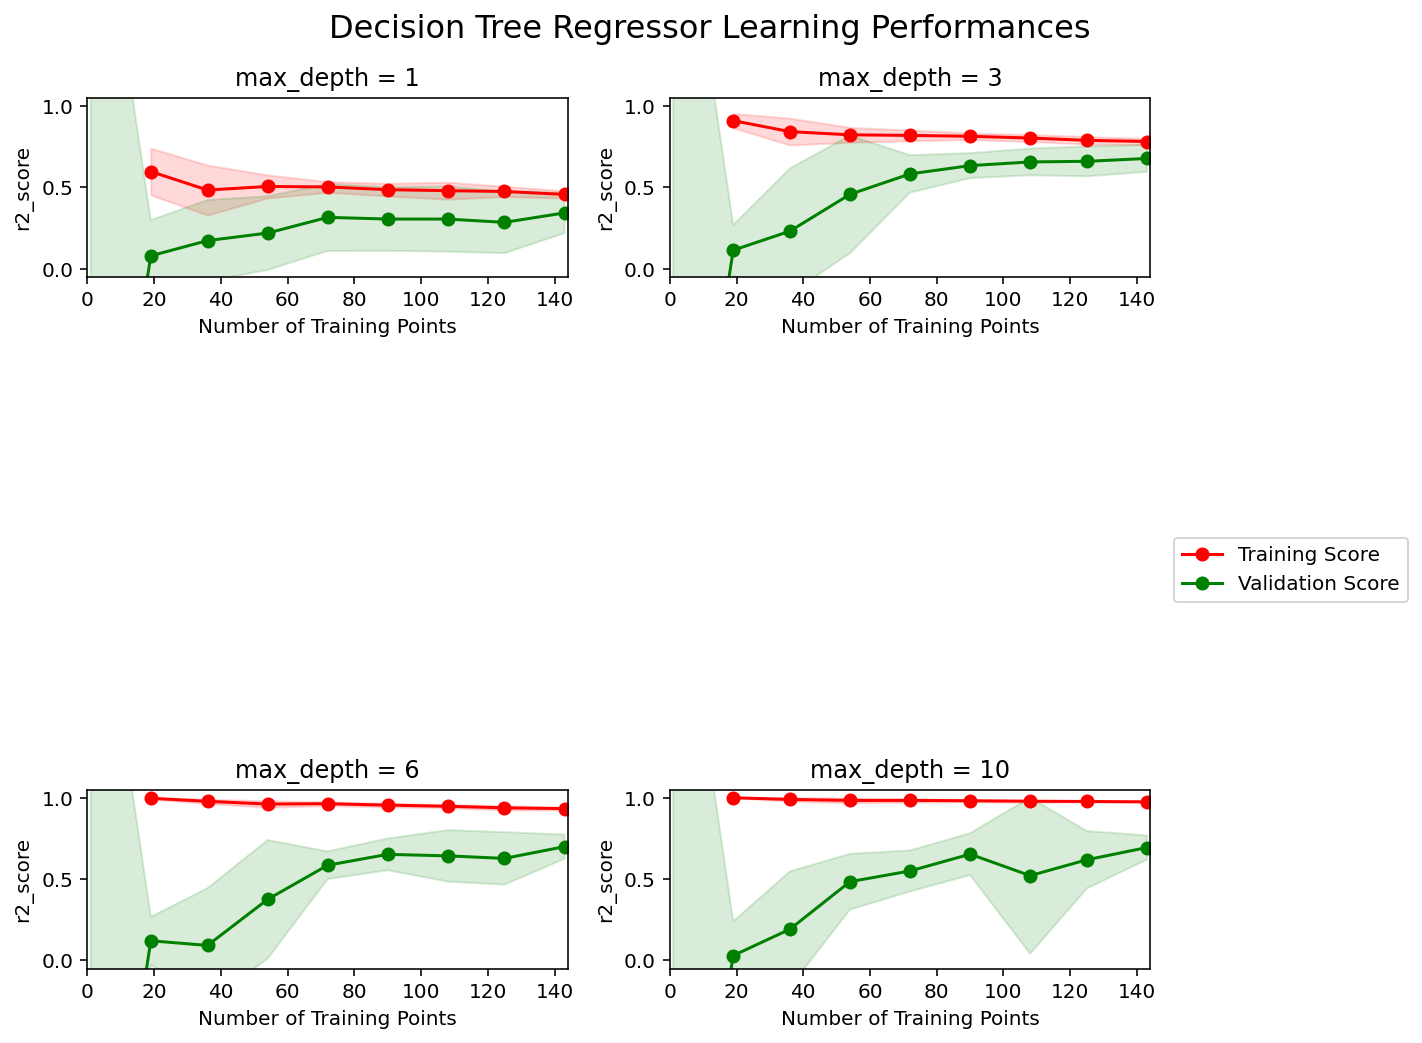

In [ ]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(X_train, y_train)

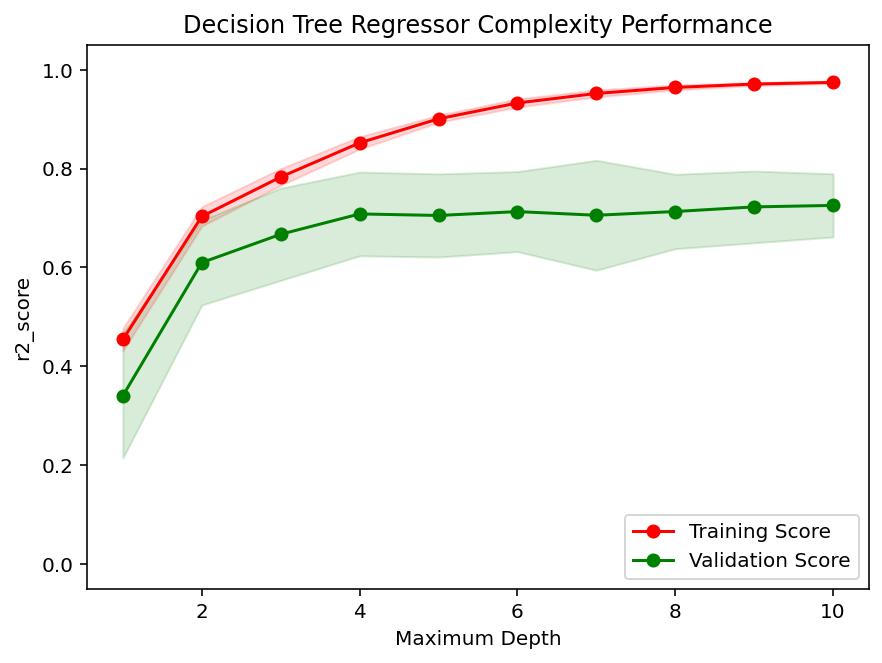

In [11]:
vs.ModelComplexity(X_train, y_train)

In [12]:
# Evaluate model performance (use Grid Search)
# TODO: Import 'KFold', 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X,y):
  """Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]."""
  # Create cross-validation sets from the training data
  cross_validator = KFold(n_splits=10, random_state=1, shuffle=True)

  # TODO: Create a decision tree regressor object
  regressor = DecisionTreeRegressor()

  # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
  params = {'max_depth':range(1,11)}

  # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
  scoring_fnc = make_scorer(performance_metric)

  # TODO: Create the grid search cv object --> GridSearchCV()
  # Make sure to include the right parameters in the object:
  # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
  grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cross_validator)

  # Fit the grid search object to the data to compute the optimal model
  grid = grid.fit(X,y)

  # Return the optimal model after fitting the data
  return grid.best_estimator_

# Prediction
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


In [63]:
# Evaluate model performance (use Grid Search)
# TODO: Import 'make_scorer', 'DecisionTreeRegressor'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor

# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

# TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
params = {'max_depth':3}

# TODO: Create a decision tree regressor object
model = DecisionTreeRegressor(**params)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

Optimal model has RMSE of training set: 7.886513761279964
Optimal model has RMSE of test set: 8.621436629188679
Optimal model has R2 score of training set 0.76 on test data.
Optimal model has R2 score of test set 0.80 on test data.


In [64]:
# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria

# Show predictions
for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Predicted bio-crude oil yield for the composition of Feedstock 1: 22.08 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 22.08 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 34.43 wt%
